In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import seaborn as sns


In [84]:
df = pd.read_csv(r'ifood_df.csv')
df['id'] = df.index
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,id
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,0
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,1
2,71613,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,2
3,26646,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,3
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223,0,1,46,709,43,182,42,118,247,...,0,0,0,1,0,0,1094,847,0,2200
2201,64014,2,1,56,406,0,30,0,0,8,...,0,0,0,0,0,1,436,428,1,2201
2202,56981,0,0,91,908,48,217,32,12,24,...,0,0,0,1,0,0,1217,1193,1,2202
2203,69245,0,1,8,428,30,214,80,30,61,...,0,0,0,0,1,0,782,721,0,2203


# Exploratory Data Analysis (EDA)

In [85]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Income                2205 non-null   int64
 1   Kidhome               2205 non-null   int64
 2   Teenhome              2205 non-null   int64
 3   Recency               2205 non-null   int64
 4   MntWines              2205 non-null   int64
 5   MntFruits             2205 non-null   int64
 6   MntMeatProducts       2205 non-null   int64
 7   MntFishProducts       2205 non-null   int64
 8   MntSweetProducts      2205 non-null   int64
 9   MntGoldProds          2205 non-null   int64
 10  NumDealsPurchases     2205 non-null   int64
 11  NumWebPurchases       2205 non-null   int64
 12  NumCatalogPurchases   2205 non-null   int64
 13  NumStorePurchases     2205 non-null   int64
 14  NumWebVisitsMonth     2205 non-null   int64
 15  AcceptedCmp3          2205 non-null   int64
 16  Accept

### Checking for Null Values

In [86]:
print('There are no null values in any column\n')


There are no null values in any column



### Checking for duplicate rows

In [87]:
df[df.duplicated()]
duplicate_number = len(df[df.duplicated()])
print(f'There are {duplicate_number} duplicate rows')

There are 0 duplicate rows


### Checking for Unique Values

In [88]:
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [89]:
maritals = df.loc[:,df.columns.str.startswith('mari')]
education = df.loc[:,df.columns.str.startswith('education')]

mnt = df.filter(regex='(?i)^mnt') #(?i) to make it case insensitive
mnt['total_minus_total/regproducts'] = mnt['MntWines']+mnt['MntFruits']+mnt['MntMeatProducts']+ mnt['MntFishProducts']+mnt['MntSweetProducts']+mnt['MntGoldProds']

C:\Users\chukw\AppData\Local\Temp\ipykernel_18068\2189113617.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnt['total_minus_total/regproducts'] = mnt['MntWines']+mnt['MntFruits']+mnt['MntMeatProducts']+ mnt['MntFishProducts']+mnt['MntSweetProducts']+mnt['MntGoldProds']


### Statistical Analysis

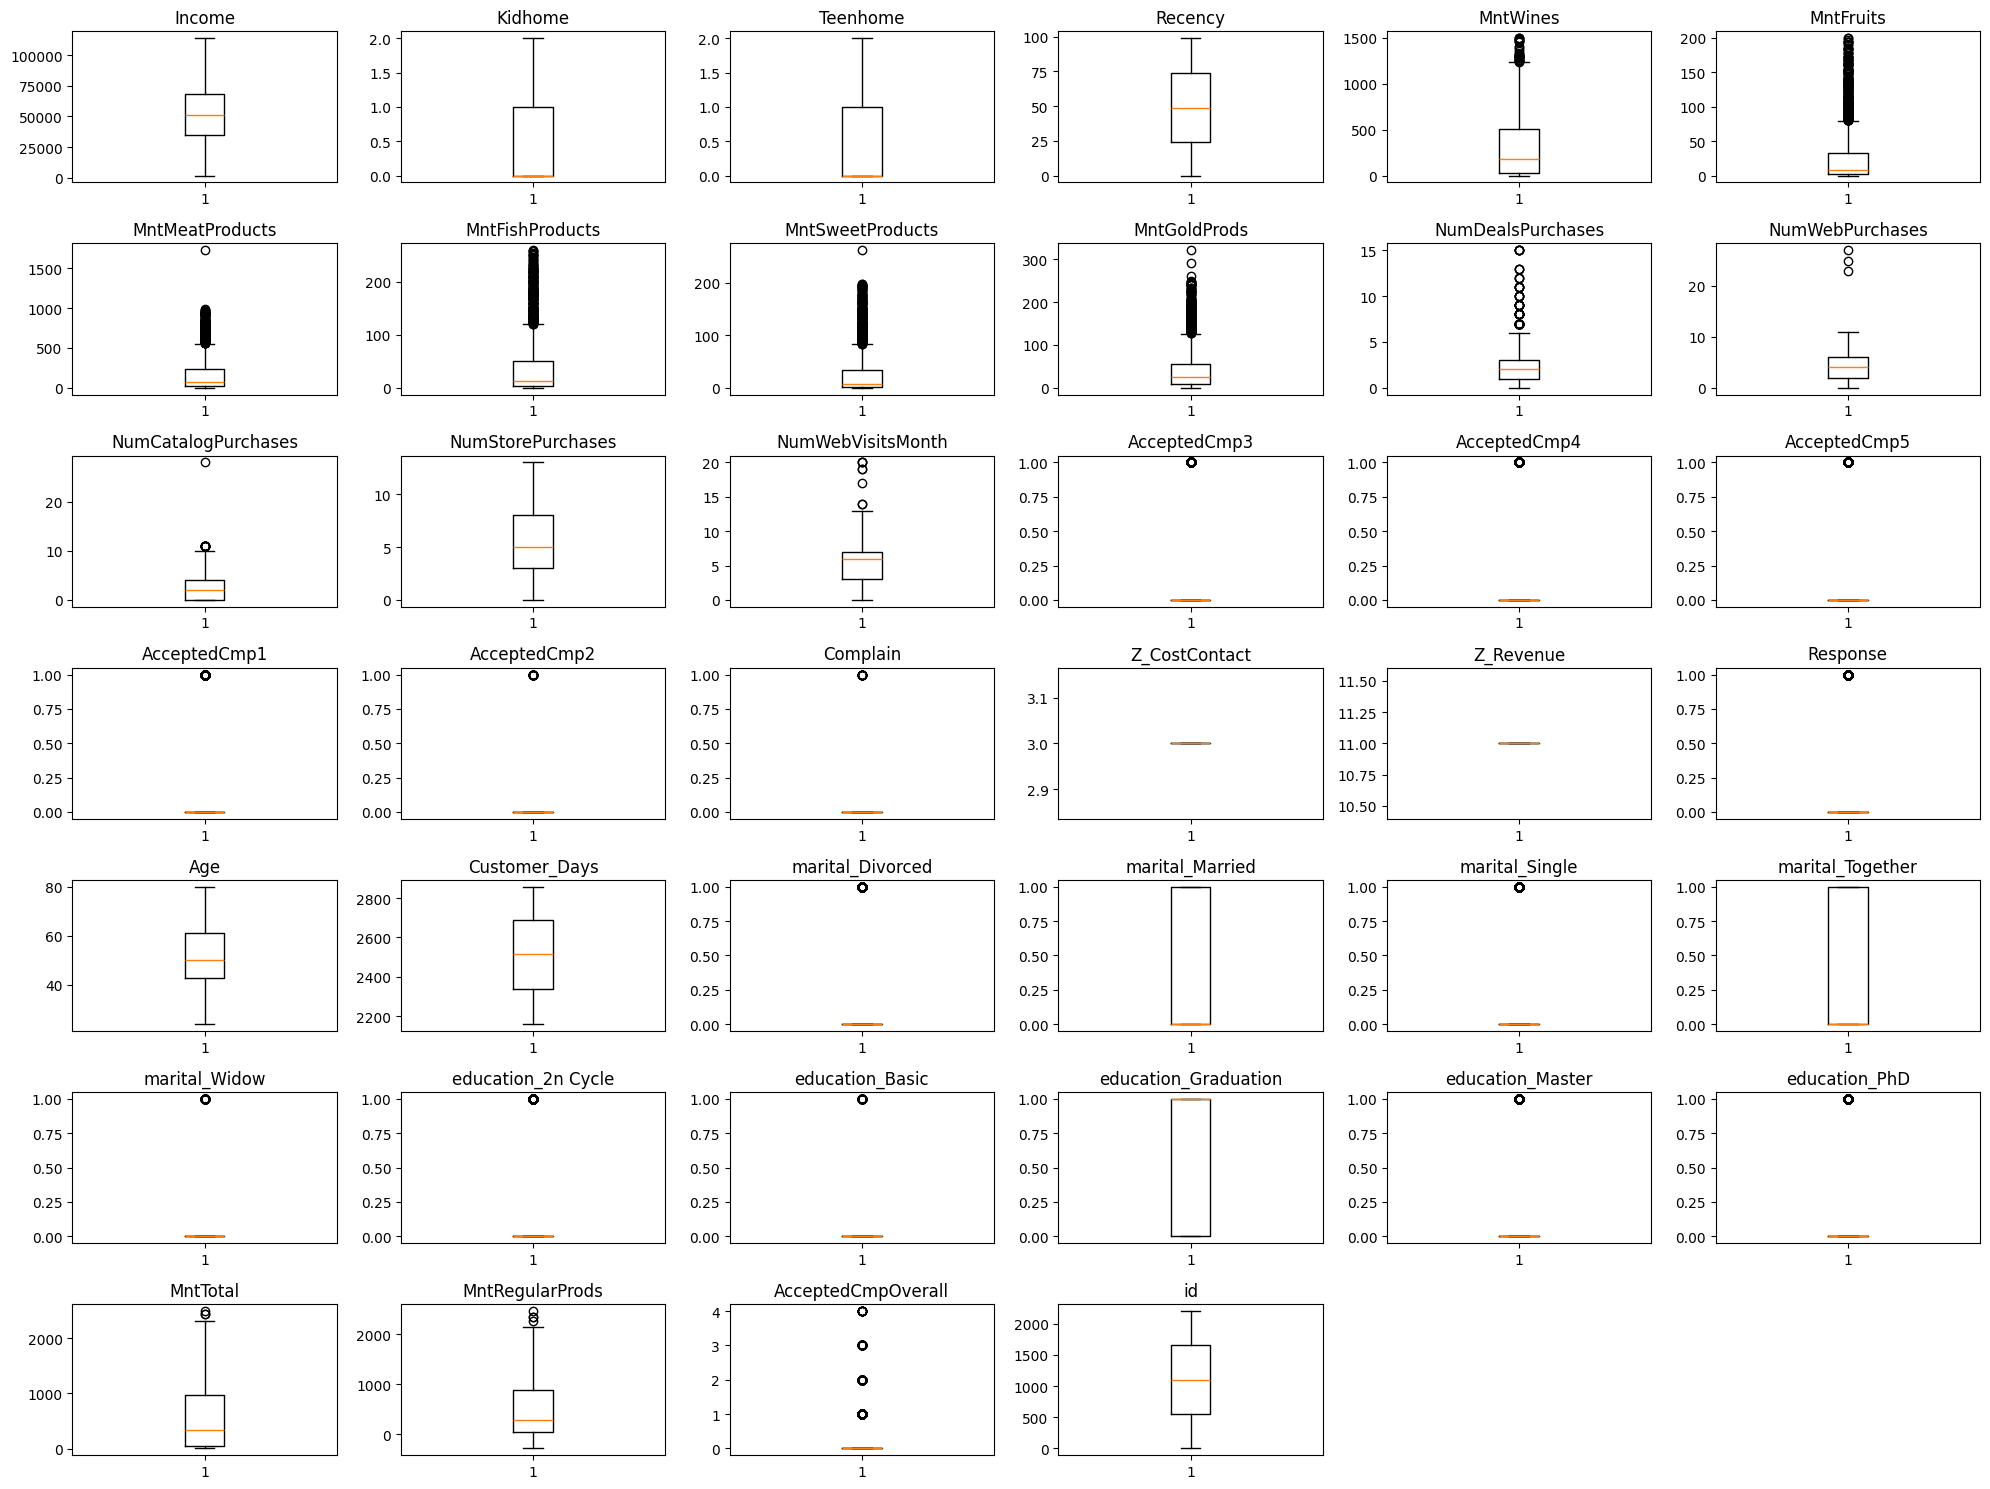

In [90]:
num_cols_per_row = 6

plt.figure(figsize=(20,15))
for i,cols in enumerate(df.columns):
    plt.subplot((len(df.columns) // num_cols_per_row) + 1, num_cols_per_row, i + 1)
    plt.boxplot(df[cols])
    plt.title(f'{cols}')

plt.tight_layout()
plt.show()

## Income distribution of Customers

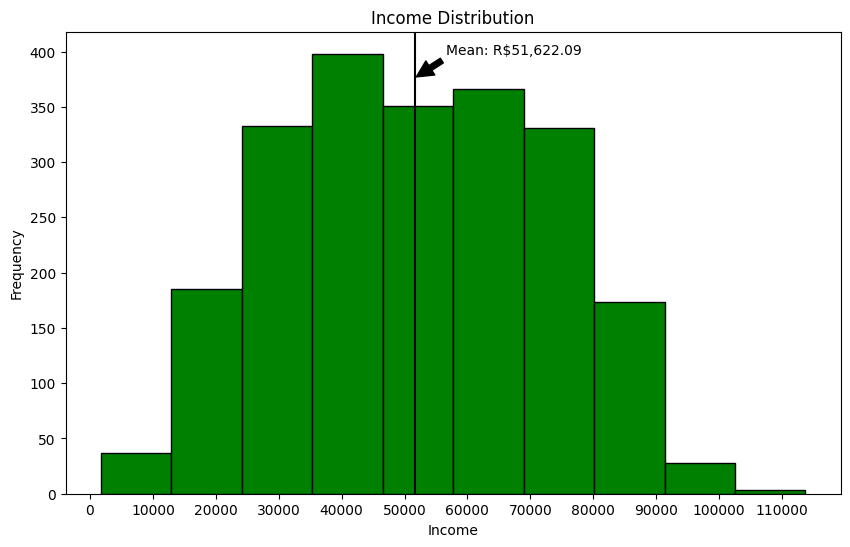

In [164]:
x_ticks = np.arange(0,120000,10000)
mean_value = x=np.mean(df['Income'])

plt.figure(figsize=(10,6))
df['Income'].hist(edgecolor='black',color='green')
plt.grid()
plt.axvline(mean_value,color='black',linestyle='-')
plt.title('Income Distribution')
plt.ylabel('Frequency')
plt.xlabel('Income')
plt.xticks(x_ticks)


plt.annotate(f'Mean: R${mean_value:,.2f}',xy=(mean_value,plt.ylim()[1]*0.9),xytext=(mean_value+5000,plt.ylim()[1]*0.95),arrowprops={'facecolor':'black','shrink':0.05})
# plt.annotate(f'Mean: {mean_value:,.2f}', xy=(mean_value, plt.ylim()[1] * 0.8), xytext=(mean_value + 5000, plt.ylim()[1] * 0.85), arrowprops=dict(facecolor='black', shrink=0.05))
 

plt.show()

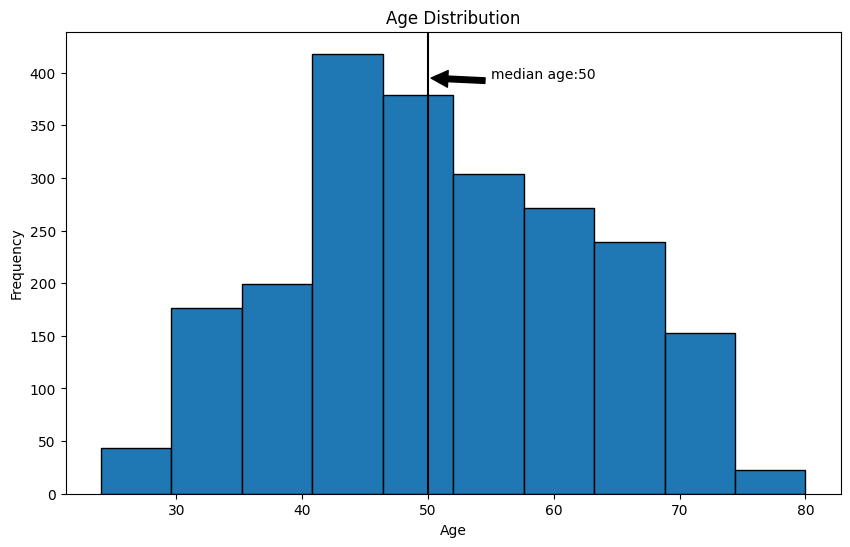

In [92]:
median_age = np.median(df['Age'])

plt.figure(figsize=(10,6))
df['Age'].hist(edgecolor='black')

plt.title('Age Distribution')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.axvline(median_age,color='black')
plt.annotate(f'median age:{median_age:.0f}',xy=(median_age,plt.ylim()[1]* 0.9),xytext=(median_age+5,plt.ylim()[1]*0.9),arrowprops={'facecolor':'black','shrink':0.05})
plt.grid(False)
plt.show()

## Distibution of Total Amount

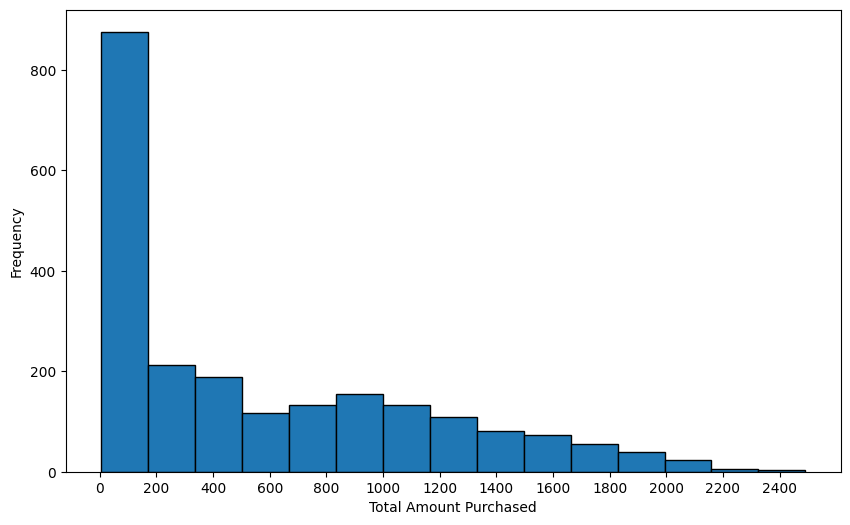

In [93]:
import numpy as np
x_ticks = np.arange(0,2600,200)

plt.figure(figsize=(10,6))
df['MntTotal'].hist(edgecolor='black',bins=15)
plt.grid(False)
plt.ylabel('Frequency')
plt.xlabel('Total Amount Purchased')
plt.xticks(x_ticks)
plt.show()

## Distribution of Accepted Campaigns

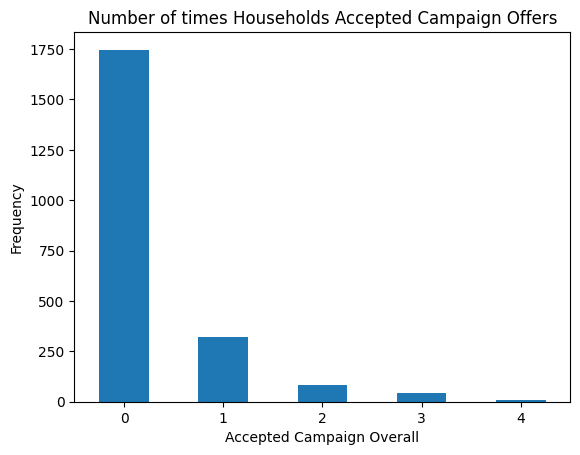

In [94]:
df['AcceptedCmpOverall'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Accepted Campaign Overall')
plt.ylabel('Frequency')
plt.title('Number of times Households Accepted Campaign Offers')
plt.show()
# Most people dont use their discounts

In [95]:
df[df['AcceptedCmpOverall']==4]['Income'].mean()
# those with the highest campaigns accepted are also one of our highest earners on average

np.float64(85861.63636363637)

### Income Distribution of those that Accepted 0 Campaigns

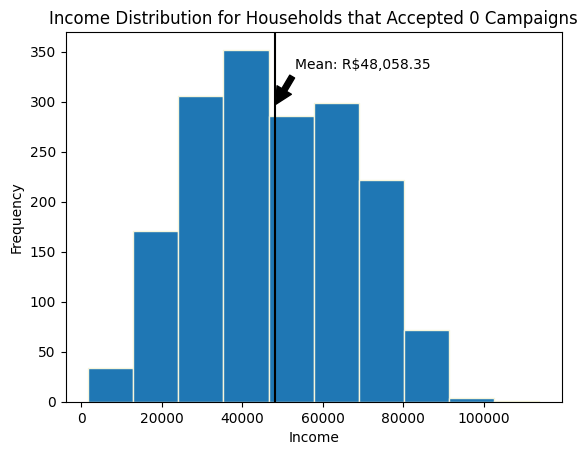

In [96]:
df[df['AcceptedCmpOverall']==0]['Income'].hist(edgecolor='beige')
plt.grid(False)
mean_value = np.mean(df[df['AcceptedCmpOverall']==0]['Income'])
plt.axvline(mean_value,color='black')
plt.title('Income Distribution for Households that Accepted 0 Campaigns')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.annotate(f'Mean: R${mean_value:,.2f}', xy=(mean_value, plt.ylim()[1] * 0.8), xytext=(mean_value + 5000, plt.ylim()[1] * 0.9), arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

### Income Distribution of those that Accepted 1 Campaigns

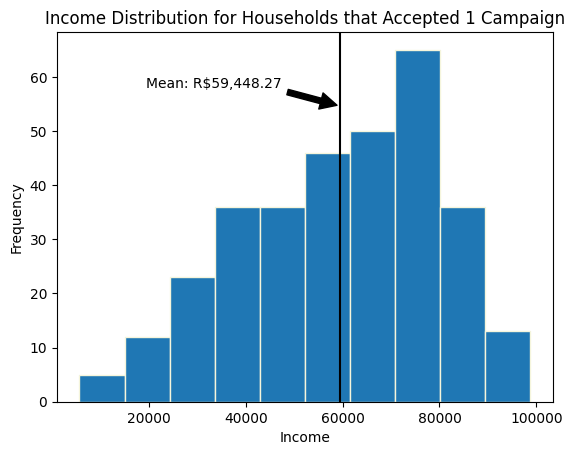

In [97]:
df[df['AcceptedCmpOverall']==1]['Income'].hist(edgecolor='beige')
plt.grid(False)
mean_value = np.mean(df[df['AcceptedCmpOverall']==1]['Income'])
plt.axvline(mean_value,color='black')
plt.title('Income Distribution for Households that Accepted 1 Campaign')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.annotate(f'Mean: R${mean_value:,.2f}', xy=(mean_value, plt.ylim()[1] * 0.8), xytext=(mean_value - 40000, plt.ylim()[1] * 0.85), arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

### Income Distribution of those that Accepted 2 Campaigns

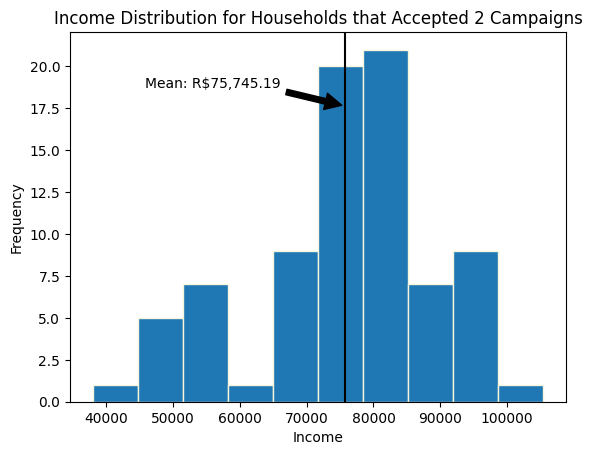

In [98]:
df[df['AcceptedCmpOverall']==2]['Income'].hist(edgecolor='beige')
plt.grid(False)
mean_value = np.mean(df[df['AcceptedCmpOverall']==2]['Income'])
plt.axvline(mean_value,color='black')
plt.title('Income Distribution for Households that Accepted 2 Campaigns')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.annotate(f'Mean: R${mean_value:,.2f}', xy=(mean_value, plt.ylim()[1] * 0.8), xytext=(mean_value - 30000, plt.ylim()[1] * 0.85), arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

### Income Distribution of those that Accepted 3 Campaigns

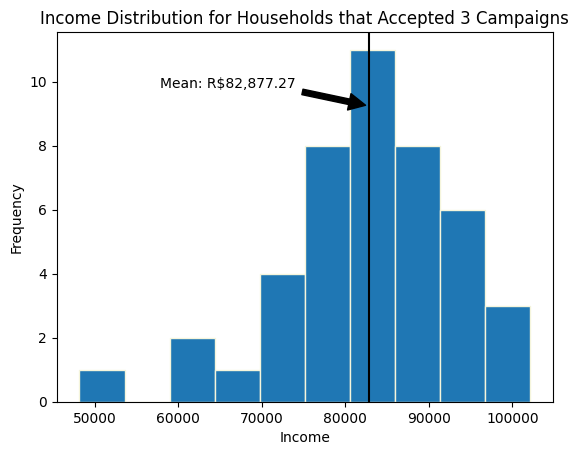

In [99]:
df[df['AcceptedCmpOverall']==3]['Income'].hist(edgecolor='beige')
plt.grid(False)
mean_value = np.mean(df[df['AcceptedCmpOverall']==3]['Income'])
plt.axvline(mean_value,color='black')
plt.title('Income Distribution for Households that Accepted 3 Campaigns')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.annotate(f'Mean: R${mean_value:,.2f}', xy=(mean_value, plt.ylim()[1] * 0.8), xytext=(mean_value - 25000, plt.ylim()[1] * 0.85), arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

### Income Distribution of those that Accepted 4 Campaigns

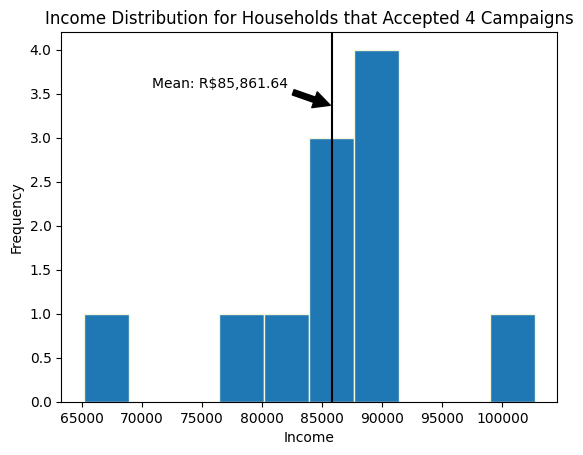

In [100]:
df[df['AcceptedCmpOverall']==4]['Income'].hist(edgecolor='beige')
plt.grid(False)
mean_value = np.mean(df[df['AcceptedCmpOverall']==4]['Income'])
plt.axvline(mean_value,color='black')
plt.title('Income Distribution for Households that Accepted 4 Campaigns')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.annotate(f'Mean: R${mean_value:,.2f}', xy=(mean_value, plt.ylim()[1] * 0.8), xytext=(mean_value - 15000, plt.ylim()[1] * 0.85), arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

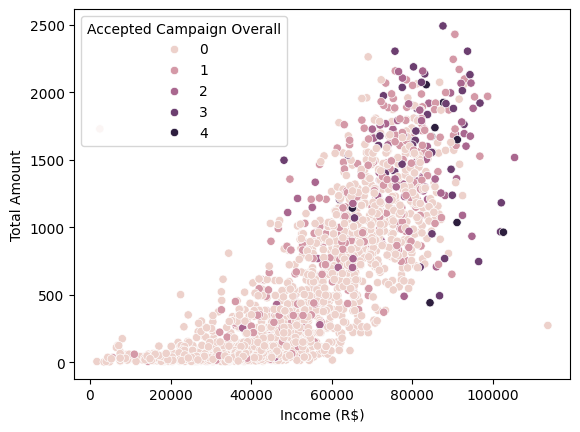

In [101]:
sns.scatterplot(data=df,x='Income',y='MntTotal',hue='AcceptedCmpOverall',legend=True)
plt.legend(title='Accepted Campaign Overall')
plt.xlabel('Income (R$)')
plt.ylabel('Total Amount')
plt.show()

The above shows that households who earn more on average accept more campaigns

In [102]:
children = df[['id','Income','Kidhome','Teenhome','AcceptedCmpOverall']]
children['total_children'] = df['Teenhome'] + df['Kidhome']

C:\Users\chukw\AppData\Local\Temp\ipykernel_18068\727127066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children['total_children'] = df['Teenhome'] + df['Kidhome']


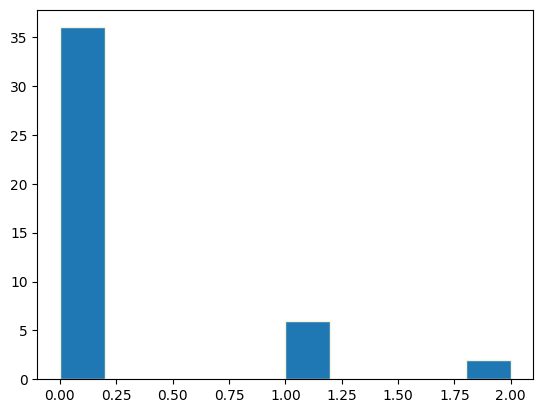

In [103]:
children[children['AcceptedCmpOverall']==3]['total_children'].hist(edgecolor='beige')
plt.grid(False)
plt.show()

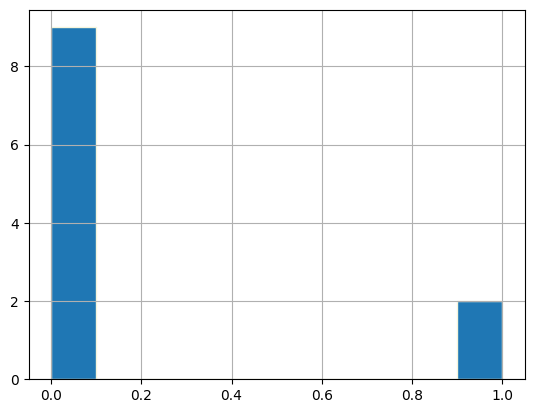

In [104]:
children[children['AcceptedCmpOverall']==4]['total_children'].hist(edgecolor='beige')
plt.show()

In [105]:
df['Kidhome'].value_counts()

Kidhome
0    1276
1     883
2      46
Name: count, dtype: int64

total quantity for households with no kids
total qty for households with kids>0

Those with kids

C:\Users\chukw\AppData\Local\Temp\ipykernel_18068\2688940727.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Cumulative Total: {total:,.0f}',prop={'size':15},title_fontsize='14')


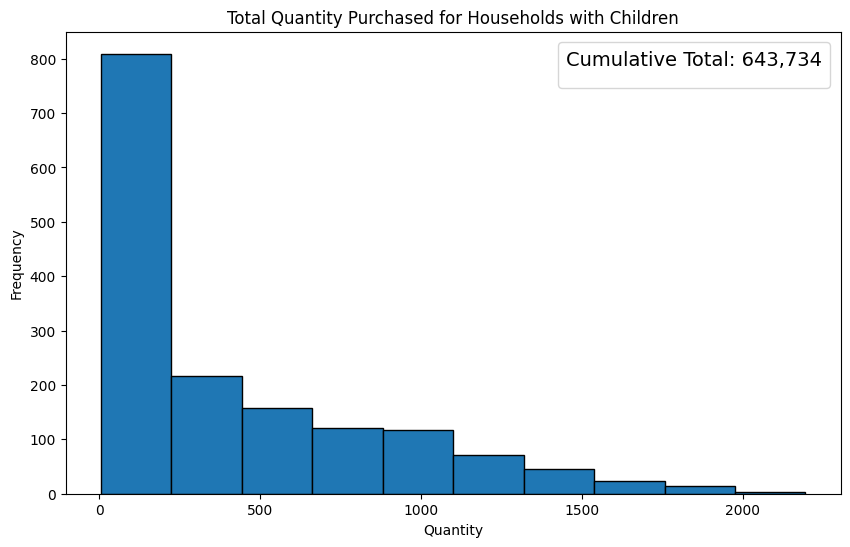

In [106]:
plt.figure(figsize=(10,6))

combined_kids_amount = pd.concat([children,mnt],axis=1)
combined_kids_amount[combined_kids_amount['total_children']>0]['total_minus_total/regproducts'].hist(edgecolor='black')
total = combined_kids_amount[combined_kids_amount['total_children']>0]['total_minus_total/regproducts'].sum()
plt.grid(False)
plt.title('Total Quantity Purchased for Households with Children')
plt.ylabel('Frequency')
plt.xlabel('Quantity')
plt.legend(title=f'Cumulative Total: {total:,.0f}',prop={'size':15},title_fontsize='14')
plt.show()

Those without kids

In [107]:
x_ticks = np.arange(0,4,1)



C:\Users\chukw\AppData\Local\Temp\ipykernel_18068\29331510.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Cumulative Total: {total:,.0f}',prop={'size':15},title_fontsize='14')


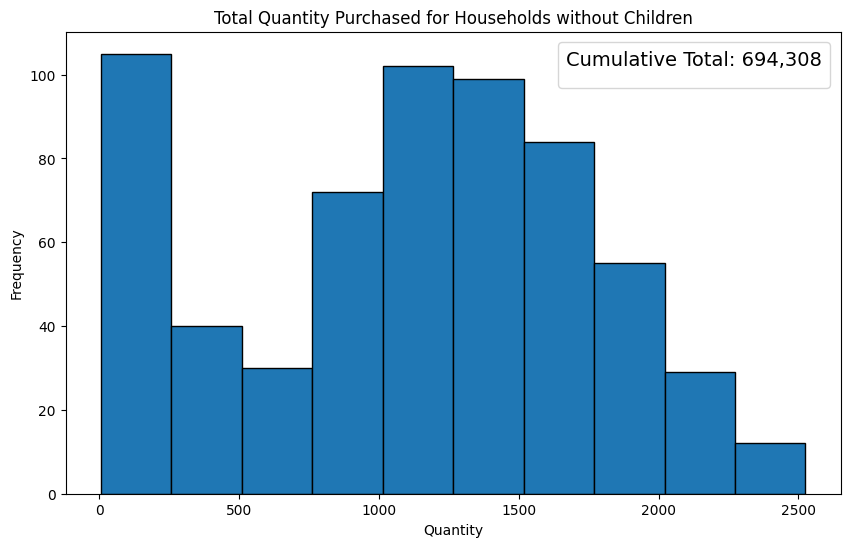

In [108]:
# not too useful - may remove
plt.figure(figsize=(10,6))
combined_kids_amount = pd.concat([children,mnt],axis=1)
combined_kids_amount[combined_kids_amount['total_children']==0]['total_minus_total/regproducts'].hist(edgecolor='black')
total = combined_kids_amount[combined_kids_amount['total_children']==0]['total_minus_total/regproducts'].sum()

plt.grid(False)
plt.title('Total Quantity Purchased for Households without Children')
plt.ylabel('Frequency')
plt.xlabel('Quantity')
plt.legend(title=f'Cumulative Total: {total:,.0f}',prop={'size':15},title_fontsize='14')
plt.show()

Those with kids buy less, no point targeting them in ads

In [109]:
import seaborn as sns


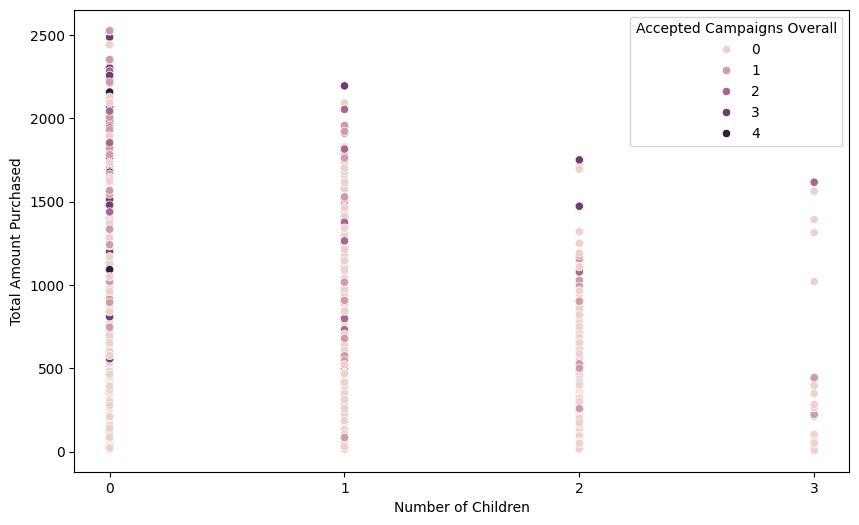

In [110]:
plt.figure(figsize=(10,6))
x_ticks = np.arange(0,4,1)
sns.scatterplot(x=combined_kids_amount['total_children'],y=combined_kids_amount['total_minus_total/regproducts'],hue=combined_kids_amount['AcceptedCmpOverall'])
plt.ylabel('Total Amount Purchased')
plt.xlabel('Number of Children')
plt.legend(title='Accepted Campaigns Overall')
plt.xticks(x_ticks)
plt.show()

Furthermore, those with children are less likley to accept our campiagns. Further proof to not even bother with some of them

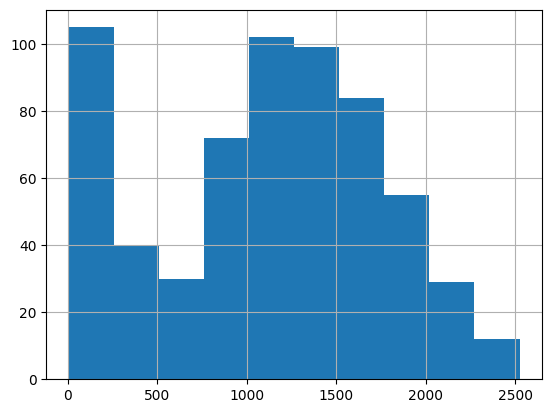

In [111]:
combined_kids_amount[combined_kids_amount['total_children']==0]['total_minus_total/regproducts'].hist()
plt.show()

In [112]:
df[df['NumStorePurchases']>0]['id'].count()
# distinct ids for those who visited store at least once

np.int64(2195)

In [113]:
df[df['NumWebPurchases']>0]['NumWebPurchases'].count()
# distinct number for those who made web purchase at least once


np.int64(2163)

In [114]:
df[df['NumCatalogPurchases']>0]['NumCatalogPurchases'].count()


np.int64(1634)

In [115]:
df[df['NumDealsPurchases']>0]['NumDealsPurchases'].count()


np.int64(2166)

Total NumDealsPurchases is 5,112


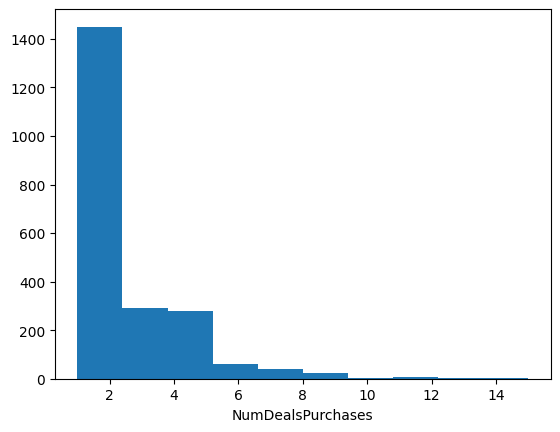

----------------------
Total NumWebPurchases is 9,042


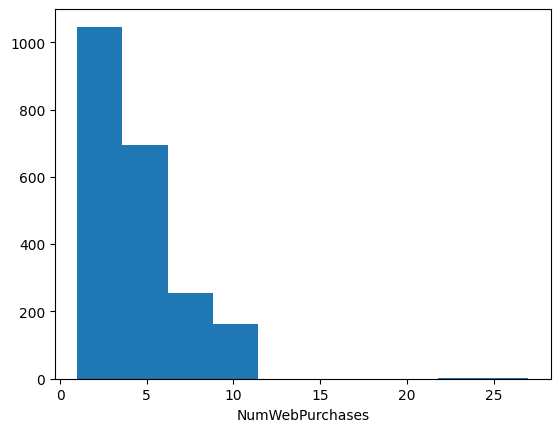

----------------------
Total NumCatalogPurchases is 5,833


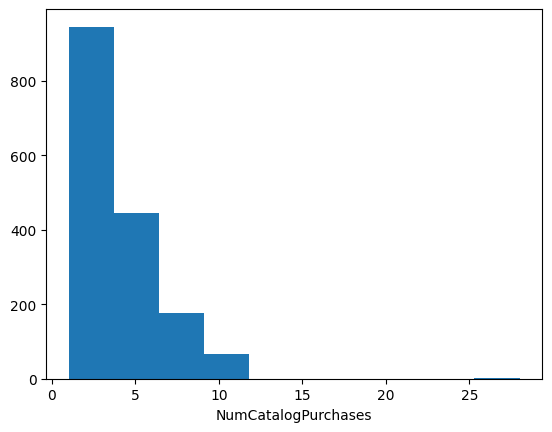

----------------------
Total NumStorePurchases is 12,841


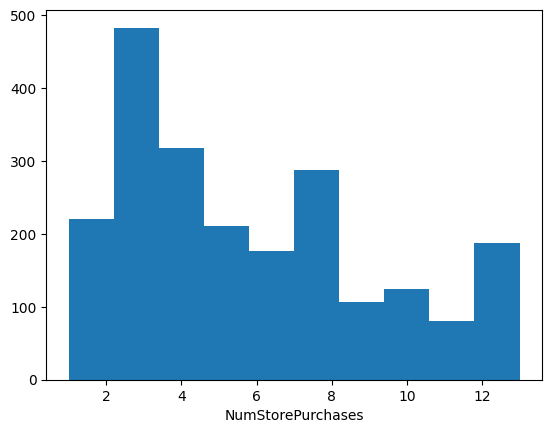

----------------------


In [116]:
cols = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
# df[df['NumWebPurchases']>0]['NumWebPurchases'].hist()

for col in cols:
    df[df[col]>0][col].hist()
    plt.xlabel(f'{col}')
    plt.grid(False)
    print(f'Total {col} is {df[col].sum():,}')
    plt.show()

    print('----------------------')

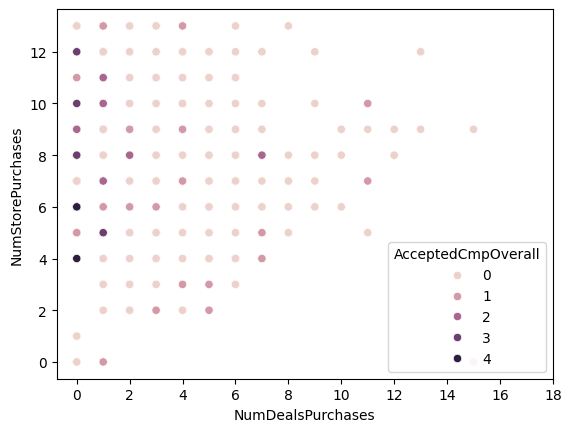

In [117]:
sns.scatterplot(data=df,y='NumStorePurchases',x='NumDealsPurchases',hue='AcceptedCmpOverall')
plt.xticks(np.arange(0,20,2))
plt.show()

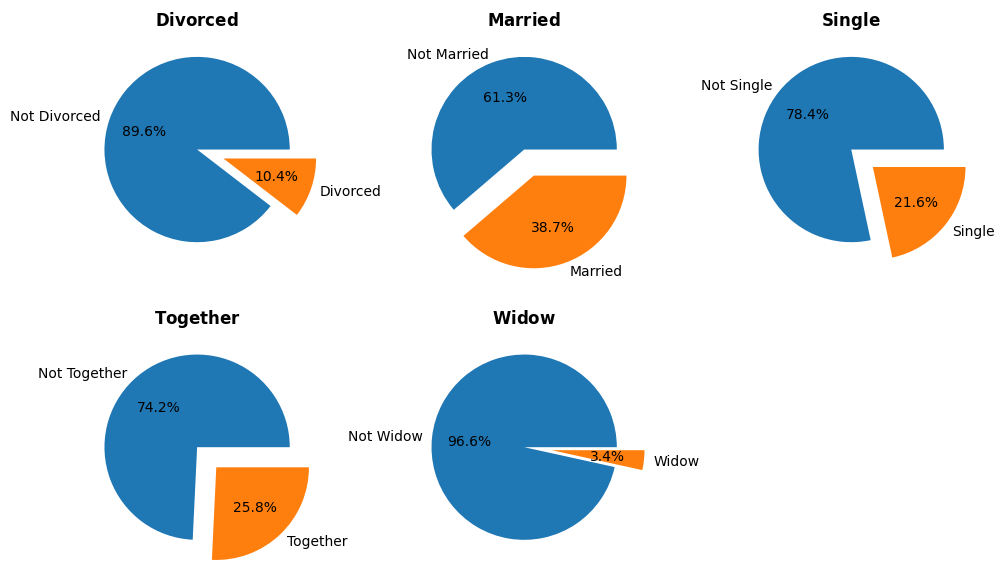

In [118]:
num_columns = len(maritals.columns) # number of colums
num_rows = 2 # Number of rows that I want
num_cols_per_row = (num_columns+1)//2
# The reason for using (num_cols + 1) // 2 is to ensure that we divide the number of columns evenly across the two rows, even if the total number of columns is odd.
# Here's the breakdown:
# When the number of columns (num_cols) is even (like 4, 6, etc.), dividing by 2 will already give you an integer, so there's no issue.
# When num_cols is odd (like 3, 5, etc.), dividing by 2 would result in a fraction if you don't account for it, and Python's integer division // will round down. By adding 1 before dividing, we effectively "round up" to ensure that the extra plot (if there's an odd number) will still fit in the layout

plt.figure(figsize=(10,6))

for i,col in enumerate(maritals.columns):
    plt.subplot(num_rows,num_cols_per_row,i+1)
    text = col.split('_')[1]
    df[col].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=[f'Not {text}',f'{text}'],explode=[0,0.3])
    plt.title(fr'${{\mathbf{{{text}}}}}$')
    plt.ylabel('')

    
plt.tight_layout()
plt.show()


## SEGMENTATION

Normalize with standard scaler

In [119]:
new_df = df.drop(['id',],axis=1)


In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(new_df),columns=new_df.columns)

use k-means to segment

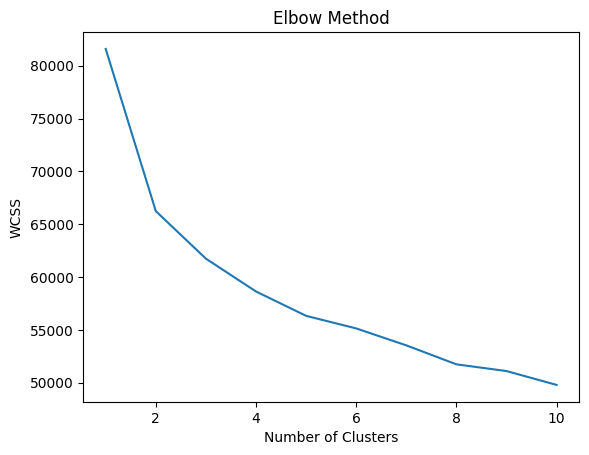

In [121]:
from sklearn.cluster import KMeans

wcss = [] # within-cluster sum of squares

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=100,n_init=5,random_state=100)
    kmeans = kmeans.fit(standardized_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number is 2 because it is the point before the curve starts to flatten. That means, adding an extra cluster marginally reduces the WCSS and very little diminishing returns

In [122]:
k = 2

kmeans = KMeans(n_clusters=k,init='k-means++',max_iter=100,n_init=5,random_state=100)
new_df['cluster'] = kmeans.fit_predict(standardized_df)
new_df.sample(2)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,cluster
344,62187,0,1,38,512,0,83,0,0,41,...,1,0,0,0,0,1,595,554,0,1
383,31395,1,1,80,23,1,25,0,8,7,...,0,1,0,0,0,0,57,50,0,1


Adding cluster column to main dataframe

In [123]:
df['cluster'] = kmeans.fit_predict(df)

Adding total children to main dataframe

In [124]:
df['total_children'] = df['Teenhome'] + df['Kidhome']

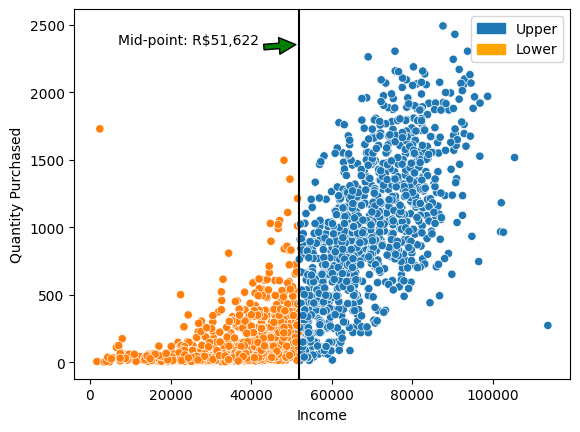

In [125]:
sns.scatterplot(data=df,x='Income',y='MntTotal',hue='cluster')

plt.ylabel('Quantity Purchased')
plt.legend(handles = [Patch(color='#1f77b4',label='Upper'),Patch(color='orange',label='Lower')])
plt.axvline(52000,color='black')
# plt.annotate(f'Mean: R${mean_value:,.2f}',xy=(mean_value,plt.ylim()[1]*0.9),xytext=(mean_value+5000,plt.ylim()[1]*0.95),arrowprops={'facecolor':'black','shrink':0.05})

plt.annotate(f'Mid-point: R$51,622',xy=(51622,plt.ylim()[1]*0.9),xytext=(52000-45000,plt.ylim()[1]*0.9),arrowprops={'facecolor':'green','shrink':0.05})
plt.show()

In [126]:
combined_kids_amount['cluster'] = kmeans.fit_predict(standardized_df)

In [127]:
df['z_returns'] = df['Z_Revenue']-df['Z_CostContact']


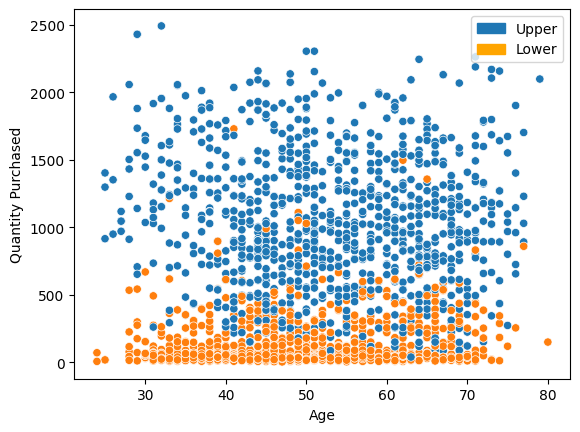

In [128]:
sns.scatterplot(data=df,x='Age',y='MntTotal',hue='cluster')
plt.ylabel('Quantity Purchased')
plt.legend(handles = [Patch(color='#1f77b4',label='Upper'),Patch(color='orange',label='Lower')])

plt.show()

## Building Model

In [129]:
preprocess_df = df.drop('id',axis=1)

features = preprocess_df.drop('Response',axis=1)
target = preprocess_df['Response']

In [130]:
target = np.array(target)

### Model 1

In [131]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=111)

# initialize model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=40,oob_score=True,random_state=112)

# train model
rfc.fit(X_train,y_train)


# testing/making predictions
print(rfc.score(X_train,y_train))
print('---------------')
prediction = rfc.predict(X_train)
print(prediction)
print('---------------')
print(y_train)

0.9937641723356009
---------------
[0 0 0 ... 0 0 1]
---------------
[0 0 0 ... 0 0 1]


In [132]:
pred1 = rfc.predict(X_test)
print(rfc.score(X_test,y_test))
print('--------')
print('--------')
print('--------')

print(pred1[:10])
print('--------')
print(y_test[:10])
print('--------')
print('--------')
print('--------')
# check accuracy
# The order is: [ True Negative   False positive] 
#               [ False Negative  True Positive ]

from sklearn.metrics import accuracy_score,confusion_matrix
ac = accuracy_score(y_test,pred1)
confusion = confusion_matrix(y_test,pred1)
confusion

0.8752834467120182
--------
--------
--------
[0 0 0 0 0 1 0 0 0 0]
--------
[0 0 0 0 0 1 1 0 0 0]
--------
--------
--------


array([[359,   7],
       [ 48,  27]])

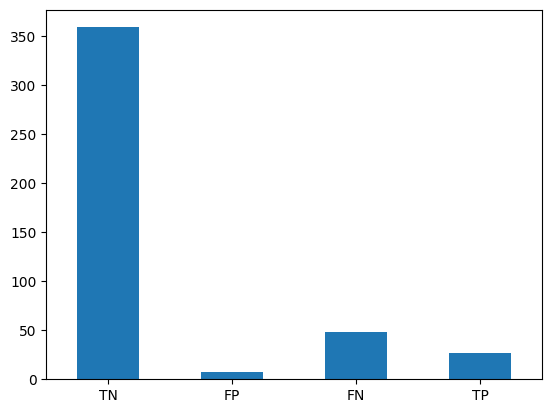

In [133]:
confusion_series = pd.Series(data=confusion.flatten(),index=['TN','FP','FN','TP'])
confusion_series.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

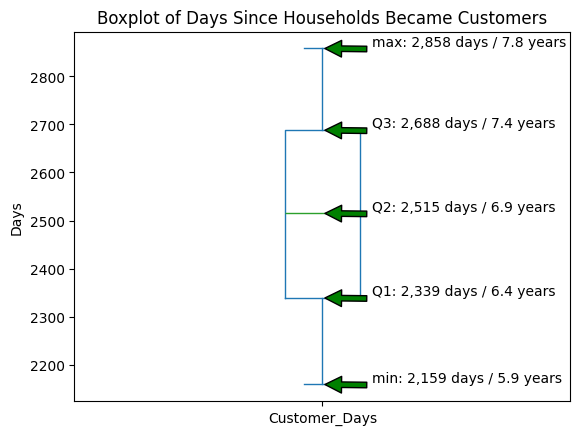

In [134]:
df['Customer_Days'].plot(kind='box')
q1,q2,q3 = df['Customer_Days'].quantile([0.25,0.5,0.75])
min = df['Customer_Days'].min()
max = df['Customer_Days'].max()

plt.title('Boxplot of Days Since Households Became Customers')
plt.xlabel('')
plt.ylabel('Days')
plt.annotate(f'Mid-point: R$51,622',xy=(51622,plt.ylim()[1]*0.9),xytext=(52000-45000,plt.ylim()[1]*0.9),arrowprops={'facecolor':'green','shrink':0.05})
plt.annotate(f'Q1: {q1:,.0f} days / {(q1/365):,.1f} years', xy=(1, q1), xytext=(1.1, q1 + 5), arrowprops={'facecolor': 'green', 'shrink': 0.05})
plt.annotate(f'Q2: {q2:,.0f} days / {(q2/365):,.1f} years', xy=(1, q2), xytext=(1.1, q2 + 5), arrowprops={'facecolor': 'green', 'shrink': 0.05})
plt.annotate(f'Q3: {q3:,.0f} days / {(q3/365):,.1f} years', xy=(1, q3), xytext=(1.1, q3 + 5), arrowprops={'facecolor': 'green', 'shrink': 0.05})
plt.annotate(f'min: {min:,.0f} days / {(min/365):,.1f} years', xy=(1, min), xytext=(1.1, min + 5), arrowprops={'facecolor': 'green', 'shrink': 0.05})
plt.annotate(f'max: {max:,.0f} days / {(max/365):,.1f} years', xy=(1, max), xytext=(1.1, max + 5), arrowprops={'facecolor': 'green', 'shrink': 0.05})

plt.show()

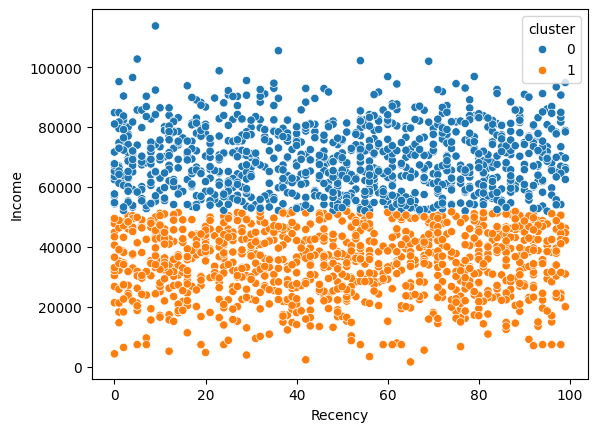

In [135]:
sns.scatterplot(data=df,x='Recency',y='Income',hue='cluster')
plt.show()

In [136]:
rfc.oob_score_

0.8639455782312925

In [137]:
### Feature importance

pd.Series(data=rfc.feature_importances_,index=rfc.feature_names_in_).sort_values(ascending=False)

Recency                 0.088685
Customer_Days           0.077900
AcceptedCmpOverall      0.072610
MntMeatProducts         0.054128
MntRegularProds         0.053844
Income                  0.052985
MntTotal                0.052787
MntWines                0.047456
MntGoldProds            0.045505
MntFruits               0.037258
Age                     0.036731
NumStorePurchases       0.036188
MntSweetProducts        0.034856
MntFishProducts         0.033910
AcceptedCmp3            0.032883
NumWebVisitsMonth       0.028884
NumCatalogPurchases     0.024348
AcceptedCmp5            0.023222
NumWebPurchases         0.022333
NumDealsPurchases       0.021747
AcceptedCmp1            0.018649
education_PhD           0.012533
total_children          0.010887
marital_Single          0.008891
marital_Together        0.007966
Teenhome                0.007725
education_Graduation    0.007363
marital_Married         0.007029
AcceptedCmp4            0.006665
education_Master        0.006631
Kidhome   

### Model 2

In [138]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=111)

# initialize model
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(n_estimators=70,oob_score=True,random_state=112)

# train model
rfc1.fit(X_train,y_train)


# testing/making predictions
print(rfc1.score(X_train,y_train))
print('---------------')
prediction = rfc1.predict(X_train)
print(prediction)
print('---------------')
print(y_train)

0.9943310657596371
---------------
[0 0 0 ... 0 0 1]
---------------
[0 0 0 ... 0 0 1]


In [139]:
rfc1.score(X_test,y_test)

0.8752834467120182

### Model 3 - logistics reg

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(random_state=100,n_jobs=10)
lr.fit(X_train,y_train)


LogisticRegression(n_jobs=10, random_state=100)

In [141]:
score = cross_val_score(lr,X_train,y_train,cv=6,scoring='accuracy')

In [142]:
print(f"Cross-validation scores: {score}")
print(f"Average accuracy: {score.mean()}")

Cross-validation scores: [0.86394558 0.86394558 0.85714286 0.86054422 0.86394558 0.85034014]
Average accuracy: 0.8599773242630385


In [143]:
score1 = cross_val_score(lr,X_test,y_test,cv=6,scoring='accuracy')

In [144]:
print(f"Cross-validation scores: {score1}")
print(f"Average accuracy: {score1.mean()}")

Cross-validation scores: [0.78378378 0.81081081 0.86486486 0.89041096 0.82191781 0.84931507]
Average accuracy: 0.8368505491793163


In [145]:
lr.score(X_train,y_train)

0.86281179138322

In [146]:
lr.score(X_test,y_test)

0.8344671201814059

## best model - 1st Model

In [147]:
### Feature importance

pd.Series(data=rfc.feature_importances_,index=rfc.feature_names_in_).sort_values(ascending=True)

Z_CostContact           0.000000
Z_Revenue               0.000000
z_returns               0.000000
Complain                0.000627
education_Basic         0.001979
marital_Widow           0.002301
education_2n Cycle      0.002535
AcceptedCmp2            0.003462
cluster                 0.003687
marital_Divorced        0.006240
Kidhome                 0.006571
education_Master        0.006631
AcceptedCmp4            0.006665
marital_Married         0.007029
education_Graduation    0.007363
Teenhome                0.007725
marital_Together        0.007966
marital_Single          0.008891
total_children          0.010887
education_PhD           0.012533
AcceptedCmp1            0.018649
NumDealsPurchases       0.021747
NumWebPurchases         0.022333
AcceptedCmp5            0.023222
NumCatalogPurchases     0.024348
NumWebVisitsMonth       0.028884
AcceptedCmp3            0.032883
MntFishProducts         0.033910
MntSweetProducts        0.034856
NumStorePurchases       0.036188
Age       

In [148]:
revised_df = preprocess_df.drop(['Z_CostContact','Z_Revenue'],axis=1)


In [149]:
features2 = revised_df.drop('Response',axis=1)
target2 = revised_df['Response']

In [150]:
# train test split
from sklearn.model_selection import train_test_split

# train/validation splits against test data
X_train_val,X_test,y_train_val,y_test = train_test_split(features2,target2,test_size=0.2,random_state=111)

# for train/validation split them apart
X_train,X_val,y_train,y_val = train_test_split(X_train_val,y_train_val,test_size=0.2,random_state=111)

# initialize model
from sklearn.ensemble import RandomForestClassifier

rfc2 = RandomForestClassifier(n_estimators=40,oob_score=True,random_state=112)

# train model
rfc2.fit(X_train,y_train)


# testing/making predictions
print(rfc2.score(X_train,y_train),'change to %')
print('---------------')
prediction = rfc2.predict(X_train)
print(prediction)
print('---------------')
print(y_train)

0.9964564138908576 change to %
---------------
[0 1 1 ... 0 0 0]
---------------
1057    0
1503    1
51      1
1188    0
1810    0
       ..
2005    0
1193    0
1429    0
467     0
584     0
Name: Response, Length: 1411, dtype: int64


In [151]:
print('Everything here is for validation')
print('Checking validation:')
pred2 = rfc2.predict(X_val)
print(rfc2.score(X_val,y_val))
print('--------')
print('--------')
print('--------')

print(pred2[:10])
print('--------')
print(y_val[:10])
print('--------')
print('--------')
print('--------')
# check accuracy
# The order is: [ True Negative   False positive] 
#               [ False Negative  True Positive ]

from sklearn.metrics import  *
ac = accuracy_score(y_val,pred2)
confusion = confusion_matrix(y_val,pred2)
confusion

Everything here is for validation
Checking validation:
0.8640226628895185
--------
--------
--------
[0 0 0 0 0 0 0 0 1 0]
--------
548     0
1060    0
212     0
1782    1
718     0
1397    0
376     0
426     0
894     1
1923    0
Name: Response, dtype: int64
--------
--------
--------


array([[294,   4],
       [ 44,  11]])

In [152]:
print('checking for test data accuracy')
score = rfc2.score(X_test,y_test)

test_pred = rfc2.predict(X_test)
print(len(test_pred))
print('--------')
print(confusion_matrix(y_test,test_pred))
print('---------')

# check accuracy
# The order is: [ True Negative   False positive] 
#               [ False Negative  True Positive ]

# print(precision_score(y_test,test_pred)) #measures the proportion of true positive predictions out of all positive predictions made by a model, reflecting its accuracy in identifying relevant results. 
# print(recall_score(y_test,test_pred)) # measures the proportion of true positive predictions out of all actual positive cases, indicating the model's ability to identify relevant instances correctly.
# print(f1_score(y_test,test_pred)) # is the harmonic mean of precision and recall, providing a balanced measure of a model’s accuracy that accounts for both false positives and false negatives.
print(accuracy_score(y_test,test_pred)) # measures the proportion of correctly predicted instances (both true positives and true negatives) out of the total instances, reflecting the overall effectiveness of a model in making accurate predictions.




checking for test data accuracy
441
--------
[[360   6]
 [ 47  28]]
---------
0.8798185941043084


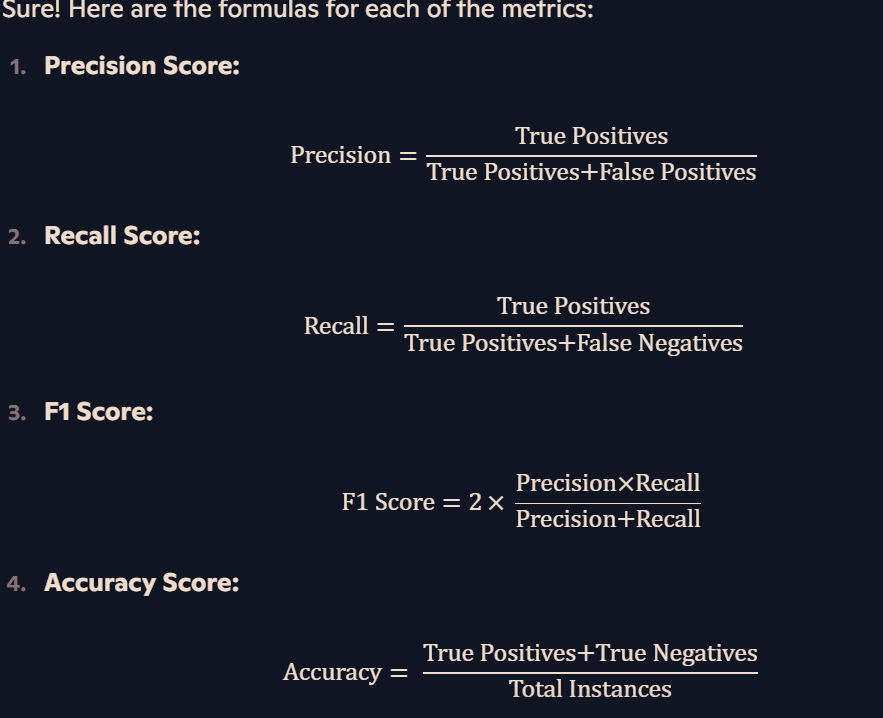

In [153]:
revised_df.groupby('Response')['Customer_Days'].count()

Response
0    1872
1     333
Name: Customer_Days, dtype: int64

In [154]:
### Feature importance

pd.Series(data=rfc2.feature_importances_,index=rfc2.feature_names_in_).sort_values(ascending=False)

Customer_Days           0.081536
Recency                 0.079652
AcceptedCmpOverall      0.078866
MntMeatProducts         0.057750
Income                  0.054675
MntTotal                0.049129
MntRegularProds         0.046520
MntWines                0.045915
MntGoldProds            0.043281
MntSweetProducts        0.039642
MntFishProducts         0.037494
NumStorePurchases       0.035519
MntFruits               0.034762
NumWebVisitsMonth       0.033416
Age                     0.031752
AcceptedCmp1            0.030604
AcceptedCmp3            0.026460
NumWebPurchases         0.025265
AcceptedCmp5            0.025220
NumCatalogPurchases     0.025134
NumDealsPurchases       0.023812
marital_Single          0.012670
education_PhD           0.009640
Teenhome                0.009242
education_Graduation    0.007271
marital_Divorced        0.006452
marital_Married         0.006041
total_children          0.005810
marital_Together        0.005587
AcceptedCmp4            0.005494
AcceptedCm

In [155]:
complete_df = X_test
complete_df['test_pred'] = test_pred
complete_df['response'] = y_test
complete_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,cluster,total_children,z_returns,test_pred,response
1737,72117,0,1,34,707,20,171,65,60,50,...,0,0,1023,973,0,0,1,8,0,0
421,32011,1,0,89,99,0,15,2,1,5,...,0,1,117,112,0,1,1,8,0,0
1995,43815,1,0,53,14,10,29,4,7,15,...,1,0,64,49,0,1,1,8,0,0
1216,55249,0,1,81,97,1,19,2,0,11,...,1,0,119,108,0,0,1,8,0,0
239,26490,0,0,92,45,47,52,21,20,25,...,0,0,185,160,0,1,0,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,50664,1,1,64,313,8,104,6,4,126,...,0,0,435,309,0,1,2,8,0,0
1356,21355,1,0,5,5,13,14,0,5,31,...,0,0,37,6,1,1,1,8,1,1
855,80812,0,0,95,769,22,500,210,143,33,...,0,0,1644,1611,3,0,0,8,1,0
2120,40590,1,1,30,154,0,50,6,11,37,...,0,0,221,184,1,1,2,8,0,0


In [156]:
count_pred = len(complete_df[complete_df['test_pred']==1]['Income'])
print(f'{count_pred} households are predicted to respond to the campaign')

34 households are predicted to respond to the campaign


In [157]:
count_actual = len(complete_df[complete_df['response']==1]['Income'])
print(f'{count_actual} households actually responded to the campaign')

75 households actually responded to the campaign


# Deployment

## Creating a simulation of 100 customers

In [158]:
names = complete_df.iloc[:,:-1].columns
main = []

for i in range(100):
    sub = []
    for i,ele in enumerate(names):
        if ele == 'Income':
            value = np.random.randint(1000,100000)
            sub.append(value)
        if ele == 'Kidhome':
            value = np.random.randint(0,1)
            sub.append(value)
        if ele == 'Teenhome':
            value = np.random.randint(0,3)
            sub.append(value)
        if ele == 'Recency':
            value = np.random.randint(0,99)
            sub.append(value)
        if ele == 'MntWines':
            value = np.random.randint(0,1493)
            sub.append(value)
        if ele == 'MntFruits':
            value = np.random.randint(0,194)
            sub.append(value)   
        if ele == 'MntMeatProducts':
            value = np.random.randint(0,951)
            sub.append(value)
        if ele == 'MntFishProducts':
            value = np.random.randint(0,258)
            sub.append(value)
        if ele == 'MntSweetProducts':
            value = np.random.randint(0,187)
            sub.append(value)
        if ele == 'MntGoldProds':
            value = np.random.randint(0,321)
            sub.append(value)
        if ele == 'NumDealsPurchases':
            value = np.random.randint(0,15)
            sub.append(value)           
        if ele == 'NumWebPurchases':
            value = np.random.randint(0,25)
            sub.append(value)   
        if ele == 'NumCatalogPurchases':
            value = np.random.randint(0,11)
            sub.append(value)
        if ele == 'NumStorePurchases':
            value = np.random.randint(0,13)
            sub.append(value)
        if ele == 'NumWebVisitsMonth':
            value = np.random.randint(0,19)
            sub.append(value)   
        if ele == 'AcceptedCmp3':
            value = np.random.randint(0,1)
            sub.append(value)   
        if ele == 'AcceptedCmp4':
            value = np.random.randint(0,1)
            sub.append(value)
        if ele == 'AcceptedCmp5':
            value = np.random.randint(0,1)
            sub.append(value)   
        if ele == 'AcceptedCmp1':
            value = np.random.randint(0,1)
            sub.append(value)   
        if ele == 'AcceptedCmp2':
            value = np.random.randint(0,1)
            sub.append(value)
        if ele == 'Complain':
            value = np.random.randint(0,1)
            sub.append(value)   
        if ele == 'Age':
            value = np.random.randint(0,76)
            sub.append(value)   
        if ele == 'Customer_Days':
            value = np.random.randint(0,2856)
            sub.append(value)   
        if ele == 'marital_Divorced':
            value = np.random.randint(0,1)
            sub.append(value)   
        if ele == 'marital_Married':
            value = np.random.randint(0,1)
            sub.append(value)   
        if ele == 'marital_Single':
            value = np.random.randint(0,1)
            sub.append(value)  
        if ele == 'marital_Together':
            value = np.random.randint(0,1)
            sub.append(value)   
        if ele == 'marital_Widow':
            value = np.random.randint(0,1)
            sub.append(value)   
        if ele == 'education_2n Cycle':
            value = np.random.randint(0,1)
            sub.append(value)   
        if ele == 'education_Basic':
            value = np.random.randint(0,1)
            sub.append(value)   
        if ele == 'education_Graduation':
            value = np.random.randint(0,1)
            sub.append(value)  
        if ele == 'education_Master':
            value = np.random.randint(0,1)
            sub.append(value) 
        if ele == 'education_PhD':
            value = np.random.randint(0,1)
            sub.append(value)  
        if ele == 'MntTotal':
            value = np.random.randint(0,2491)
            sub.append(value)  
        if ele == 'MntRegularProds':
            value = np.random.randint(0,2458)
            sub.append(value)   
        if ele == 'AcceptedCmpOverall':
            value = np.random.randint(0,4)
            sub.append(value)   
        if ele == 'cluster':
            value = np.random.randint(0,1)
            sub.append(value)   
        if ele == 'total_children':
            value = np.random.randint(0,3)
            sub.append(value) 
        if ele == 'z_returns':
            value = 5
            sub.append(value)  

            



    main.append(sub)
main = np.array(main)





In [159]:
simu = rfc2.predict(main)
simu

c:\Users\chukw\OneDrive - St. Clair College\Data Anaytics for Business_Semester 3\DAB303 - MARKETING ANALYTICS\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [160]:
simu.sum()

np.int64(19)

In [161]:
ones = []
zeros = []
for i in simu:
    if i==1:
        ones.append(i)
    else:
        zeros.append(i)

print(ones)
print(zeros)

[np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0

In [162]:
pd.Series(simu).value_counts()

0    81
1    19
Name: count, dtype: int64

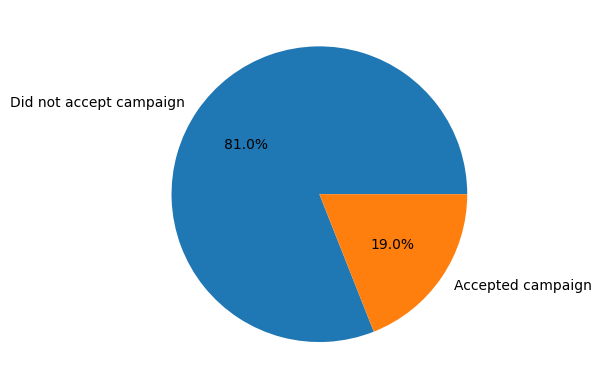

In [163]:
pd.Series(simu).value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['Did not accept campaign','Accepted campaign'])
plt.ylabel('')
plt.show()